In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/home/scholar/Documents/DOCS/AIDE/CSR302 DEXP/wheatdata.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [5]:
df.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [6]:
count = (df['LKG']>df['LK']).sum()
print(count)

15


In [7]:
x=df[df['LKG']>df['LK']].index
print(x)

Index([80, 85, 86, 97, 98, 106, 134, 139, 150, 154, 159, 160, 164, 175, 183], dtype='int64')


In [8]:
df.drop(index=x,inplace=True)

In [ ]:
#Boxplot 

#CORRELATION

<Axes: >

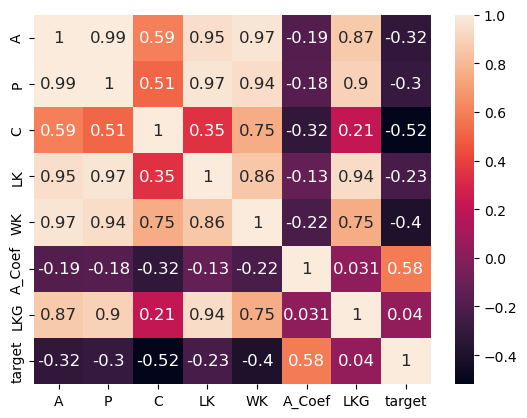

In [9]:

sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':12})

#SCATTERPLOT BETWEEN ASSYMETRIC COEFFICIENT AND COMPACTNESS

<Axes: xlabel='A_Coef', ylabel='C'>

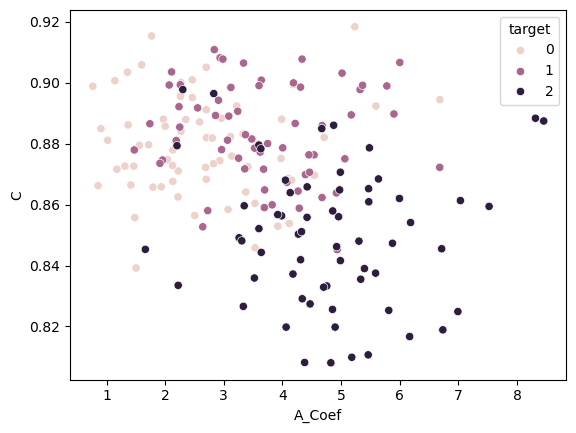

In [10]:
sns.scatterplot(x=df['A_Coef'],y=df['C'],hue=df.target)

In [11]:
import plotly.express as px 
px.scatter_3d(df,x='A_Coef',y='C',z='WK',color = 'target')

#USING 3 Dimensions make it easier to distinguish the output, but there is another way of using less dimensions but with better results, PCA

#IMPLEMENTING PCA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()

In [11]:
norm_features_df = pd.DataFrame(ss.fit_transform(df.drop(columns='target')), columns = df.columns[:-1])
norm_features_df.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142605,0.217441,-0.013938,0.312789,0.134105,-0.966764,-0.341908
1,0.010517,0.008187,0.412985,-0.163975,0.190148,-1.766273,-0.886911
2,-0.194567,-0.363819,1.423229,-0.763923,0.200823,-0.649086,-1.157348
3,-0.350988,-0.480071,1.021668,-0.688644,0.312908,-0.941509,-1.198636
4,0.448494,0.333693,1.355598,0.073267,0.801279,-1.542304,-0.434806


In [12]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2_df=pd.DataFrame(pca2.fit_transform(norm_features_df),columns=['p1','p2'])
pca2_df

,p1,p2
0,0.307618,-0.743368
1,-0.042765,-1.866388
2,-0.491452,-1.867555
3,-0.628222,-1.885132
4,1.072434,-2.048088
...,...,...
190,-2.012977,-0.796324
191,-2.731916,0.295179
192,-1.349781,1.334463
193,-2.350987,-0.016491


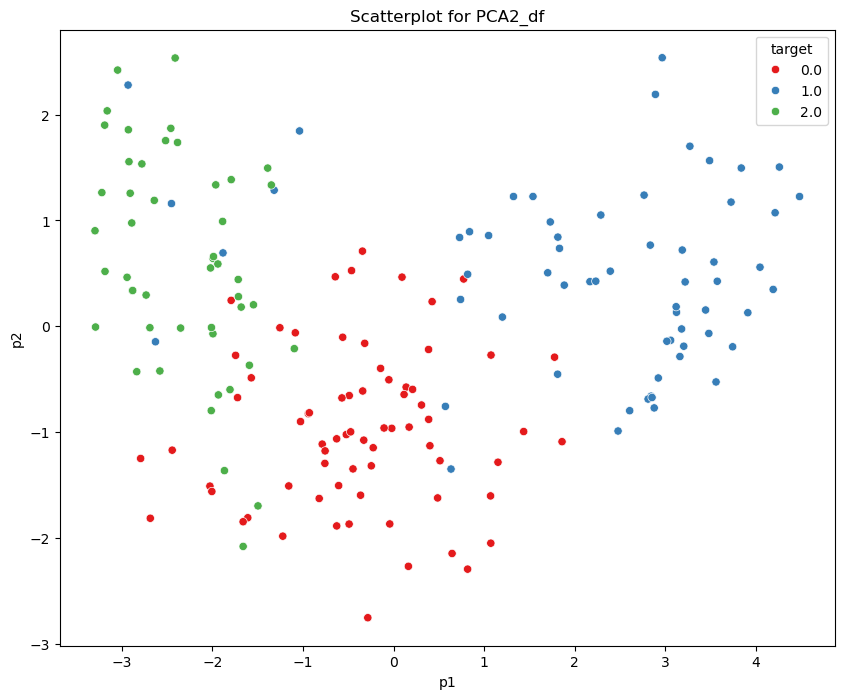

In [27]:
#scatterplot for pca2

plt.figure(figsize=(10,8))
sns.scatterplot(x=pca2_df['p1'], y=pca2_df['p2'], hue=df['target'],palette='Set1')
plt.title("Scatterplot for PCA2_df")
plt.show()

In [16]:
#covariance of norm_features_df
norm_features_df.cov()
eig_val,eig_vec =np.linalg.eig(norm_features_df.cov())
print(eig_vec)
print(eig_val)

[[ 0.4462782   0.01787239 -0.02309588  0.18776404  0.2042948  -0.73722347
  -0.42366588]
 [ 0.44349508  0.07677166  0.06339143  0.2944087   0.18253457  0.66790149
  -0.47677248]
 [ 0.26970777 -0.54119325 -0.62435378 -0.32846662 -0.33237666  0.076033
  -0.14284386]
 [ 0.42491796  0.20084212  0.21666011  0.26112642 -0.77005788 -0.04271718
   0.26299176]
 [ 0.43401774 -0.12664075 -0.20966452  0.20298737  0.4559832   0.03748312
   0.70788557]
 [-0.09717167  0.71475072 -0.68542171  0.09074712 -0.03587367  0.00388647
  -0.01868413]
 [ 0.39119893  0.36558519  0.21195929 -0.80780687  0.11078708  0.03719249
   0.0466382 ]]
[5.02105907e+00 1.24543586e+00 6.83193086e-01 6.02906286e-02
 1.98682637e-02 8.32383277e-04 5.40318284e-03]


In [17]:
var = np.round(eig_val/np.sum(eig_val),2)
print(var)

[0.71 0.18 0.1  0.01 0.   0.   0.  ]


In [23]:
transformed_df = pd.DataFrame(np.dot(norm_features_df,eig_vec))
transformed_df

,0,1,2,3,4,5,6
0,0.307618,-0.743368,0.649015,0.392735,-0.109457,0.014229,0.017214
1,-0.042765,-1.866388,0.689686,0.420681,0.044456,0.003396,0.015765
2,-0.491452,-1.867555,-0.915198,0.106168,-0.004304,0.003249,-0.048004
3,-0.628222,-1.885132,-0.483747,0.223697,0.075046,0.008703,0.233731
4,1.072434,-2.048088,-0.022736,0.130246,0.018074,0.000043,0.052275
...,...,...,...,...,...,...,...
190,-2.012977,-0.796324,-0.519200,-0.166675,-0.078833,-0.019852,-0.020832
191,-2.731916,0.295179,0.038241,-0.203609,-0.027868,-0.033796,0.057627
192,-1.349781,1.334463,-2.912443,0.032614,-0.020133,0.033417,0.093387
193,-2.350987,-0.016491,0.366633,-0.171544,0.063205,-0.014121,-0.048753


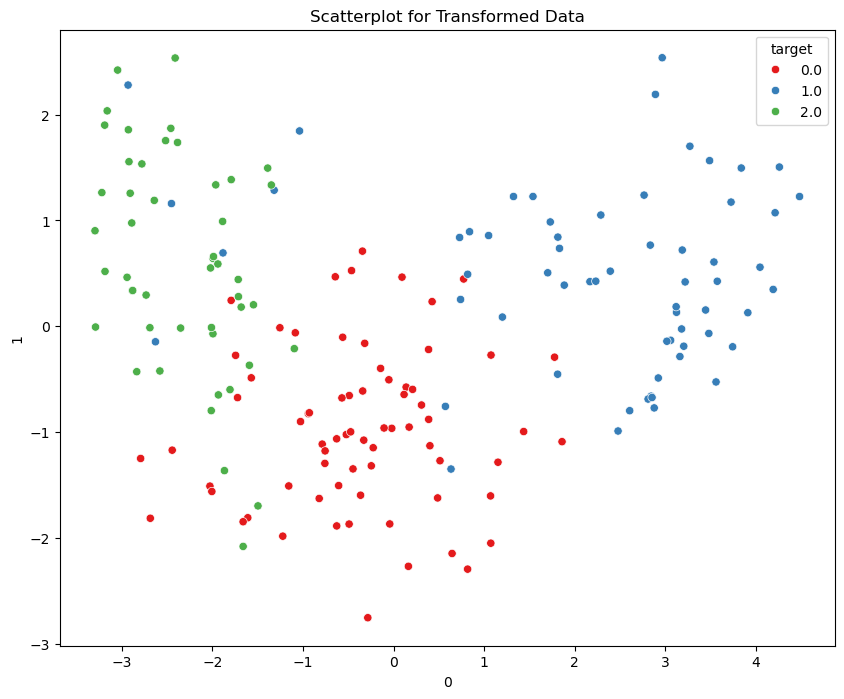

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=transformed_df[0], y=transformed_df[1], hue=df['target'],palette='Set1')
plt.title("Scatterplot for Transformed Data")
plt.show()